# Tutorial 6: Full Chain Simulation

This notebook demonstrates a simulation the ultilises the full processing chain provided in sstcam-simulation, as if it was a real camera observing Cherenkov Showers.

In [1]:
from sstcam_simulation import Camera, PixelMapping, PhotoelectronSource, EventAcquisition
from sstcam_simulation.camera.noise import GaussianNoise
from sstcam_simulation.plotting import CameraImage
from CHECLabPy.utils.resolutions import ChargeResolution
from tqdm import tqdm, trange
import numpy as np
from IPython import display
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
# Define the camera
camera = Camera(
    trigger_threshold=20,
    electronic_noise=GaussianNoise(stddev=0.1)
)

In [18]:
def run():
    source = PhotoelectronSource(camera=camera)
    acquisition = EventAcquisition(camera=camera)

    nsb = source.get_nsb(rate=5)
    cherenkov = source.get_random_cherenkov_shower()
    pe = nsb + cherenkov

    readout = acquisition.get_continuous_readout(pe)
    digital_trigger = acquisition.get_digital_trigger_readout(readout)
    trigger_times, trigger_sp = acquisition.get_backplane_trigger(digital_trigger)
    waveform = acquisition.get_sampled_waveform(readout, trigger_time=trigger_times[0])
    
    fig = plt.figure(figsize=(18, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    image = CameraImage.from_mapping(camera.pixel, ax=ax1)
    image.add_colorbar("Amplitude (p.e.)")
    image.image = waveform.max(1) / camera.reference_pulse.peak_height
    ax2.plot(waveform.T)
    
def get_event():
    while True:
        try:
            run()
            break
        except ValueError:
            pass

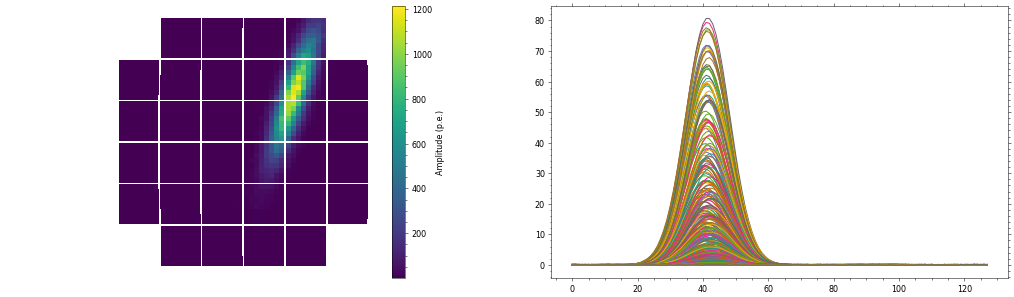

In [21]:
get_event()

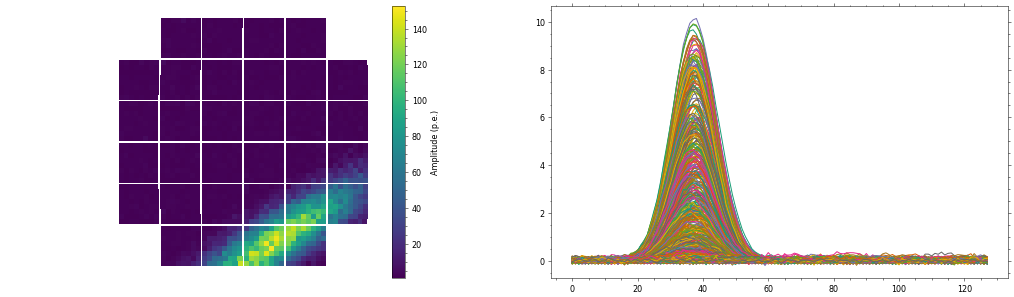

In [22]:
get_event()

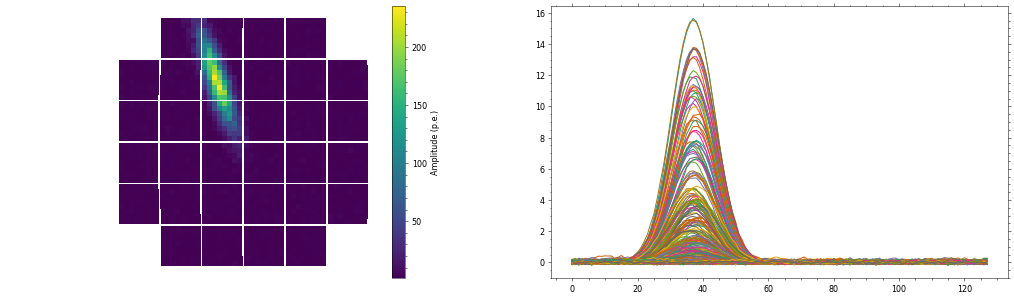

In [23]:
get_event()